In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1. Preparação dos dados para a análise<br>
Antes de iniciar sua análise, é fundamental que você primeiro examine e limpe o conjunto de<br>
dados, para tornar o trabalho com ele um processo mais eficiente. Nesta parte, você praticará a<br>
correção de tipos de dados, manipulação de valores ausentes e eliminação de colunas e linhas<br>
enquanto aprende sobre o conjunto de dados do Stanford Open Policing Project.<br>
<br>
(a) Importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos<br>
registros policiais estão catalogados;<br>

In [2]:
df1=pd.read_csv("police.csv")
df1

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


a) 15 Váriaveis e 91741 Registros.


(b) Conte o número de dados faltosos de cada variável;

A função isna() conta as ocorrencias de NaN de uma ou multiplas colunas:

In [3]:
df1.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

(c) Como estamos trabalhando somente com dados de um único estado, não faz sentido<br>
mantermos informações de variáveis como county_name e state. Exclua essas variáveis<br>
do conjunto;<br>

Função drop remove colunas ou linhas

In [4]:
df1=df1.drop(columns=['county_name'])
df1=df1.drop(columns=['state'])
df1

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


(d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises.<br>
Como apenas uma pequena fração das linhas está faltando driver_gender, remova<br>
essas linhas do conjunto de dados;<br>


dropna é uma funcao que remove as linhas com valores NaN<br>
subset é um parametro para remover apenas de acordo com a coluna

In [5]:
df1 = df1.dropna(subset=["driver_gender"])
df1

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


(e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted,<br>
is_arrested e district; depois compare com os tipos de dados que estão armazena-<br>
dos no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados<br>
para essas variáveis;<br>


search_conducted e is_arrested - Boolean<br>
district - string/objetc


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


a unica variavel a ser corrigida é is_arrested

In [7]:
pd.set_option('mode.chained_assignment', None)

In [8]:
df1['is_arrested']=df1['is_arrested'].astype('bool')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  bool  
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(3), object(10)
memory usage: 7.5+ MB


(f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas:<br>
stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeandoa como stop_datetime e converta no formato<br>data e hora (tipo datetime). Isso habilitará atributos baseados em data convenientes que usaremos posteriormente no projeto;

In [10]:
df1['stop_datetime'] = df1['stop_date'] + " " + df1['stop_time']
df1['stop_datetime']

0        2005-01-04 12:55
1        2005-01-23 23:15
2        2005-02-17 04:15
3        2005-02-20 17:15
4        2005-02-24 01:20
               ...       
91736    2015-12-31 21:21
91737    2015-12-31 21:59
91738    2015-12-31 22:04
91739    2015-12-31 22:09
91740    2015-12-31 22:47
Name: stop_datetime, Length: 86536, dtype: object

In [11]:
df1['stop_datetime']=pd.to_datetime(df1['stop_datetime'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           86536 non-null  object        
 1   stop_time           86536 non-null  object        
 2   driver_gender       86536 non-null  object        
 3   driver_race         86536 non-null  object        
 4   violation_raw       86536 non-null  object        
 5   violation           86536 non-null  object        
 6   search_conducted    86536 non-null  bool          
 7   search_type         3307 non-null   object        
 8   stop_outcome        86536 non-null  object        
 9   is_arrested         86536 non-null  bool          
 10  stop_duration       86536 non-null  object        
 11  drugs_related_stop  86536 non-null  bool          
 12  district            86536 non-null  object        
 13  stop_datetime       86536 non-null  datetime64

(g) Por fim, transforme a coluna stop_datetime no índice do dataframe

In [12]:
df1 = df1.set_index('stop_datetime')

In [13]:
df1.index.names = [None]

In [14]:
df1

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
2015-12-31 22:09:00,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


2 - Análise do gênero sobre as infrações<br>
O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito?<br>
Nesta parte, você explorará essa questão enquanto pratica filtragem, agrupamento e muito<br>
mais!<br>

(a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infrações cometidas por todos os <br>motoristas para obter uma compreensão básica dos dados.<br>
Construa uma distribuição de frequências da variável violation e responda: qual a<br>
infração mais comum e a menos notificada?


In [15]:
df1['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

Mais Comum: Speeding (excesso de velocidade)<br>
Menos Comum: Seat Belt (cinto de segurança)

(b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e feminino tendem a cometer diferentes <br>tipos de infrações de trânsito? Para isso, crie uma tabela<br>
de contingência para frequência absoluta e outra para frequência relativa, contendo a<br>
distribuição conjunta das variáveis driver_gender e violation.


In [16]:
df1['driver_gender'].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

Frequencia absoluta e relativa em relação aos homens

In [17]:
homens=df1.loc[df1['driver_gender']=='M']
homens['violation'].value_counts()

Speeding               32777
Moving violation       12938
Equipment               8420
Other                   3702
Registration/plates     2647
Seat belt               2278
Name: violation, dtype: int64

In [18]:
homens['violation'].value_counts(normalize=True)*100

Speeding               52.224276
Moving violation       20.614385
Equipment              13.415761
Other                   5.898474
Registration/plates     4.217520
Seat belt               3.629585
Name: violation, dtype: float64

Frequencia absoluta e relativa em relação às mulheres

In [19]:
mulheres=df1.loc[df1['driver_gender']=='F']
mulheres['violation'].value_counts()

Speeding               15646
Moving violation        3286
Equipment               2501
Registration/plates     1056
Other                    707
Seat belt                578
Name: violation, dtype: int64

In [20]:
mulheres['violation'].value_counts(normalize=True)*100

Speeding               65.811391
Moving violation       13.821822
Equipment              10.519896
Registration/plates     4.441827
Other                   2.973837
Seat belt               2.431227
Name: violation, dtype: float64

Mulheres tendem a ter mais violações em relação à Excesso de Velocidade e Registros/Placas(diferença<br>
de apenas 0,23%) que homens.<br>
E homens tendem a ter mais violações em relação à Violação em movimento, Equipamento, Cinto de Segurança e<br>
outras violações do que as mulheres".<br>

(c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;


In [21]:
a = pd.crosstab(df1['driver_gender'], df1['violation'])
a

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2501,3286,707,1056,578,15646
M,8420,12938,3702,2647,2278,32777


<AxesSubplot:xlabel='driver_gender'>

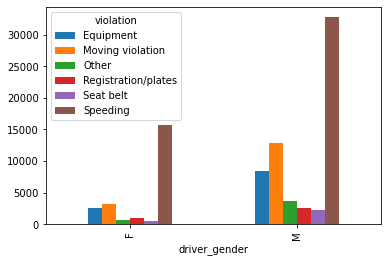

In [22]:
a.plot.bar()

(d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que<br>
o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar<br>
evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma<br>
tabela de contingência considerando as variáveis driver_gender e stop_outcome e<br>
então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um<br>
"Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);<br>

In [23]:
SpM=mulheres.loc[mulheres['violation']=='Speeding']
SpM['stop_outcome'].value_counts(normalize=True)*100

Citation            95.219225
Warning              4.007414
Arrest Driver        0.575227
N/D                  0.095871
Arrest Passenger     0.063914
No Action            0.038348
Name: stop_outcome, dtype: float64

In [24]:
SpH=homens.loc[homens['violation']=='Speeding']
SpH['stop_outcome'].value_counts(normalize=True)*100

Citation            94.459530
Warning              3.618391
Arrest Driver        1.589529
Arrest Passenger     0.128139
No Action            0.106782
N/D                  0.097629
Name: stop_outcome, dtype: float64

Existe uma pequena diferença de 0,76% e 0,39% sendo maior a porcentagem para as mulheres.

A razão entre os dados:<br>
95,21 / 4,00 = 23,80 -> mulheres <br>
94,45 / 3,61 = 26,16 -> homens

In [25]:
SpDf1=df1.loc[df1['violation']=='Speeding']
pd.crosstab(SpDf1['driver_gender'], SpDf1['stop_outcome'], normalize=True, margins=True, margins_name='Total')*100

stop_outcome,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning,Total
driver_gender,,,,,,,
F,0.185862,0.020651,30.766371,0.030977,0.012391,1.294839,32.311092
M,1.075935,0.086736,63.938624,0.066084,0.072280,2.449249,67.688908
Total,1.261797,0.107387,94.704996,0.097061,0.084671,3.744089,100.000000


(e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta,<br>
primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em<br>
uma revista de veículo;

F. Absoluta:

In [26]:
pd.crosstab(df1['driver_gender'], df1['search_conducted'])

search_conducted,False,True
driver_gender,,
F,23318,456
M,59911,2851


F. Relativa

In [27]:
pd.crosstab(df1['driver_gender'], df1['search_conducted'], normalize=True)*100

search_conducted,False,True
driver_gender,,
F,26.946011,0.526948
M,69.232458,3.294583


(f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo<br>
separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo<br>
tempo usando groupby;


In [28]:
mulheres['search_conducted'].value_counts(normalize=True)*100

False    98.081938
True      1.918062
Name: search_conducted, dtype: float64

In [29]:
homens['search_conducted'].value_counts(normalize=True)*100

False    95.457442
True      4.542558
Name: search_conducted, dtype: float64

(g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infração, e a diferença na taxa de <br>revista entre homens e mulheres é porque eles tendem a<br>
cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero<br>
e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

In [30]:
x = mulheres.loc[mulheres['search_conducted']==True]
x['violation'].value_counts(normalize=True)*100

Speeding               28.508772
Moving violation       28.289474
Equipment              21.929825
Registration/plates    12.719298
Other                   6.359649
Seat belt               2.192982
Name: violation, dtype: float64

In [31]:
y = homens.loc[homens['search_conducted']==True]
y['violation'].value_counts(normalize=True)*100

Speeding               32.058927
Moving violation       27.920028
Equipment              21.115398
Registration/plates    10.101719
Other                   5.997895
Seat belt               2.806033
Name: violation, dtype: float64

Homens sao mais revistado por excesso de velocidade e cinto de segurança, enquanto<br>
as mulheres sao mais revistadas por 

3 - Análise exploratória visual dos dados <br>
É mais provável que você seja preso em uma determinada hora do dia? As paradas relacionadas <br>
às drogas estão aumentando? Nesta parte, você responderá a essas e outras questões analisando o conjunto de dados  <br>visualmente, uma vez que os gráficos podem ajudá-lo a entender <br>
as tendências de uma forma que o exame dos dados brutos não pode.

(a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido <br>como taxa de prisão. Você descobrirá se a taxa de<br>
prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em<br>
todas as paradas no DataFrame, calculando a média da coluna is_arrested ;


In [32]:
df1['is_arrested'].value_counts(normalize=True)*100

False    96.443099
True      3.556901
Name: is_arrested, dtype: float64

In [33]:
taxa=df1['is_arrested'].mean()
taxa

0.0355690117407784

Taxa de prisão: 3,55%

(b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice.<br>
A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso,<br>
agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a<br>
média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate<br>
com os valores encontrados da taxa de prisão por hora;

In [34]:
df1_copy=df1
df1_copy['stop_time']=pd.to_datetime(df1_copy['stop_time'])
df1_copy= df1_copy.set_index('stop_time')

In [35]:
taxa_pph=df1_copy['is_arrested']
dftaxa=pd.DataFrame(taxa_pph)
dftaxa=dftaxa.loc[dftaxa['is_arrested']==True]
hourly_arrest_rate=dftaxa.groupby(pd.Grouper(freq='H')).sum()
hourly_arrest_rate= (hourly_arrest_rate/hourly_arrest_rate.sum())*100
hourly_arrest_rate

,is_arrested
stop_time,
2022-03-27 00:00:00,8.057180
2022-03-27 01:00:00,8.512021
2022-03-27 02:00:00,5.295647
2022-03-27 03:00:00,2.079272
2022-03-27 04:00:00,0.389864
2022-03-27 05:00:00,0.259909
2022-03-27 06:00:00,1.397011
2022-03-27 07:00:00,1.851852
2022-03-27 08:00:00,3.508772


In [36]:
hourly_arrest_rate.mean()

is_arrested    4.166667
dtype: float64

Text(0, 0.5, 'taxa de prisões')

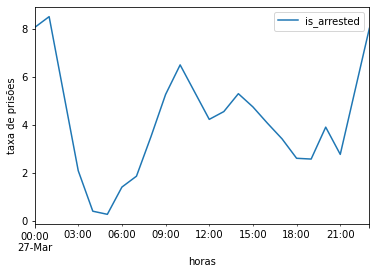

In [37]:
hourly_arrest_rate.plot()
plt.xlabel('horas') # Eixo x 
plt.ylabel('taxa de prisões') # Eixo y 

(d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão<br>
se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica<br>
se drogas foram encontradas durante uma determinada parada. Você calculará a taxa<br>
anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para<br>
visualizar como a taxa mudou ao longo do tempo;

In [38]:
taxa_dpa=df1['drugs_related_stop']
dftaxadpa=pd.DataFrame(taxa_dpa)
dftaxadpa=dftaxadpa.loc[dftaxadpa['drugs_related_stop']==True]
Annual_drugs_rate=dftaxadpa.groupby(pd.Grouper(freq='Y')).sum()
Annual_drugs_rate= (Annual_drugs_rate/Annual_drugs_rate.sum())*100
Annual_drugs_rate

,drugs_related_stop
2005-12-31,1.856148
2006-12-31,8.468677
2007-12-31,8.352668
2008-12-31,7.192575
2009-12-31,8.236659
2010-12-31,8.352668
2011-12-31,8.700696
2012-12-31,11.948956
2013-12-31,11.484919
2014-12-31,13.921114


<AxesSubplot:>

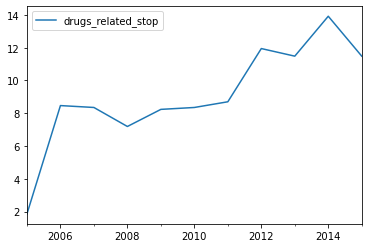

In [39]:
Annual_drugs_rate.plot()

(e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão <br>associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos <br>abordagens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de<br>
abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos.<br>
Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo.<br>
Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted<br>
e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e<br>
Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os<br>
dados desse resultado da concatenação;

In [40]:
taxa_pa=df1['search_conducted']
dftaxapa=pd.DataFrame(taxa_pa)
dftaxapa=dftaxapa.loc[dftaxapa['search_conducted']==True]
Annual_search_rate=dftaxapa.groupby(pd.Grouper(freq='Y')).sum()
Annual_search_rate= (Annual_search_rate/Annual_search_rate.sum())*100
Annual_search_rate

,search_conducted
2005-12-31,3.658905
2006-12-31,12.700333
2007-12-31,12.035077
2008-12-31,10.069549
2009-12-31,10.825522
2010-12-31,9.676444
2011-12-31,8.315694
2012-12-31,10.553372
2013-12-31,6.864227
2014-12-31,8.345933


In [41]:
a=pd.concat([Annual_drugs_rate,Annual_search_rate], axis=1)
a

,drugs_related_stop,search_conducted
2005-12-31,1.856148,3.658905
2006-12-31,8.468677,12.700333
2007-12-31,8.352668,12.035077
2008-12-31,7.192575,10.069549
2009-12-31,8.236659,10.825522
2010-12-31,8.352668,9.676444
2011-12-31,8.700696,8.315694
2012-12-31,11.948956,10.553372
2013-12-31,11.484919,6.864227
2014-12-31,13.921114,8.345933


<AxesSubplot:>

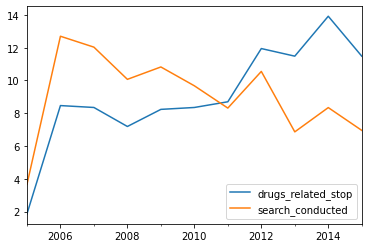

In [42]:
a.plot()

(f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos<br>
como zonas. Como as zonas se comparam em termos de quais infrações são detectadas<br>
pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e<br>
violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas<br>
’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados<br>
obtido na tabela, e responda a questão colocada.

In [43]:
pd.crosstab(df1['district'], df1['violation'])


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


<AxesSubplot:>

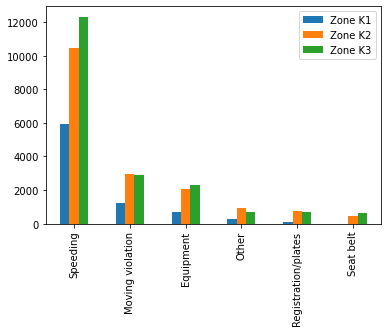

In [44]:
k1=df1.loc[df1['district']=='Zone K1']
k1=pd.DataFrame(k1['violation'].value_counts())
k1.rename(columns={'violation': 'Zone K1'}, inplace=True)

k2=df1.loc[df1['district']=='Zone K2']
k2=pd.DataFrame(k2['violation'].value_counts())
k2.rename(columns={'violation': 'Zone K2'}, inplace=True)

k3=df1.loc[df1['district']=='Zone K3']
k3=pd.DataFrame(k3['violation'].value_counts())
k3.rename(columns={'violation': 'Zone K3'}, inplace=True)
a = pd.concat([k1,k2,k3], axis=1)
a.plot.bar()

A zona K3 há mais ocorrencias, ja a K1 tem menos ocorrencia.

4. Analisando o efeito do clima no policiamento<br>
Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar<br>
o impacto das condições meteorológicas no comportamento da polícia durante as paradas de<br>
trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de<br>
dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.<br>

In [45]:
df2=pd.read_csv('weather.csv')
df2

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o conjunto, selecione as variáveis <br>relativas à temperatura (TMIN, TAVG, TMAX), imprima as<br>
principais medidas resumo usando o comando describe e plote os três boxplots dessas<br>
variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com<br>
base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se<br>
de que a temperatura é medida em graus Fahrenheit, não Celsius!


In [46]:
tavg=df2.groupby(['TAVG']).describe()

In [47]:
max_=df2.groupby('TMAX').describe()

In [48]:
min_=df2.groupby('TMIN').describe()

In [49]:
tavg

TMIN                                                       TMAX  \
     count       mean       std   min    25%   50%    75%   max count   
TAVG                                                                    
6.0    1.0  -3.000000       NaN  -3.0  -3.00  -3.0  -3.00  -3.0   1.0   
8.0    1.0  -3.000000       NaN  -3.0  -3.00  -3.0  -3.00  -3.0   1.0   
9.0    2.0   1.000000  1.414214   0.0   0.50   1.0   1.50   2.0   2.0   
10.0   2.0  -1.500000  2.121320  -3.0  -2.25  -1.5  -0.75   0.0   2.0   
11.0   3.0   3.666667  2.081666   2.0   2.50   3.0   4.50   6.0   3.0   
...    ...        ...       ...   ...    ...   ...    ...   ...   ...   
82.0   6.0  71.500000  3.016621  67.0  70.00  71.5  73.75  75.0   6.0   
83.0   3.0  73.333333  1.527525  72.0  72.50  73.0  74.00  75.0   3.0   
84.0   5.0  75.000000  1.581139  73.0  74.00  75.0  76.00  77.0   5.0   
85.0   2.0  75.500000  0.707107  75.0  75.25  75.5  75.75  76.0   2.0   
86.0   1.0  77.000000       NaN  77.0  77.00  77.0  77.00  77.0   1.0   

                 ... WT21      WT22                               
           mean  ...  75% max count mean std min 25% 50% 75% max  
TAVG             ...                                              
6.0   18.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
8.0   20.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
9.0   18.500000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
10.0  24.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
11.0  17.666667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
...         ...  ...  ...  ..   ...  ...  ..  ..  ..  ..  ..  ..  
82.0  93.166667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
83.0  92.666667  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
84.0  94.800000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
85.0  95.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
86.0  98.000000  ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  

[80 rows x 192 columns]

In [50]:
max_

TAVG                                                   TMIN             \
     count   mean       std   min    25%   50%    75%   max count       mean   
TMAX                                                                           
15     1.0  11.00       NaN  11.0  11.00  11.0  11.00  11.0   2.0   4.500000   
16     0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   2.0   3.500000   
17     1.0   9.00       NaN   9.0   9.00   9.0   9.00   9.0   3.0   6.666667   
18     4.0  10.25  2.872281   6.0   9.75  11.5  12.00  12.0   5.0   3.400000   
19     2.0  14.50  3.535534  12.0  13.25  14.5  15.75  17.0   3.0   7.666667   
...    ...    ...       ...   ...    ...   ...    ...   ...   ...        ...   
98     1.0  86.00       NaN  86.0  86.00  86.0  86.00  86.0   2.0  74.000000   
99     0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  72.000000   
100    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   2.0  76.500000   
101    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  76.000000   
102    0.0    NaN       NaN   NaN    NaN   NaN    NaN   NaN   1.0  73.000000   

      ... WT21      WT22                               
      ...  75% max count mean std min 25% 50% 75% max  
TMAX  ...                                              
15    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
16    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
17    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
18    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
19    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
...   ...  ...  ..   ...  ...  ..  ..  ..  ..  ..  ..  
98    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
99    ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
100   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
101   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  
102   ...  NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN  

[88 rows x 192 columns]

In [51]:
min_

TAVG                                                       TMAX  \
     count       mean       std   min    25%   50%    75%   max count   
TMIN                                                                    
-5     1.0  13.000000       NaN  13.0  13.00  13.0  13.00  13.0   1.0   
-3     3.0   8.000000  2.000000   6.0   7.00   8.0   9.00  10.0   3.0   
-2     1.0  13.000000       NaN  13.0  13.00  13.0  13.00  13.0   2.0   
-1     3.0  15.333333  4.041452  13.0  13.00  13.0  16.50  20.0   3.0   
 0     2.0   9.500000  0.707107   9.0   9.25   9.5   9.75  10.0   2.0   
...    ...        ...       ...   ...    ...   ...    ...   ...   ...   
 73    8.0  80.125000  2.900123  76.0  77.75  80.5  82.25  84.0  21.0   
 74    3.0  82.333333  1.527525  81.0  81.50  82.0  83.00  84.0  10.0   
 75    4.0  83.500000  1.290994  82.0  82.75  83.5  84.25  85.0  10.0   
 76    2.0  84.500000  0.707107  84.0  84.25  84.5  84.75  85.0   5.0   
 77    2.0  85.000000  1.414214  84.0  84.50  85.0  85.50  86.0   3.0   

                 ... WT21      WT22                                    
           mean  ...  75% max count mean std  min  25%  50%  75%  max  
TMIN             ...                                                   
-5    34.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
-3    22.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
-2    21.500000  ...  NaN NaN   1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  
-1    24.666667  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 0    20.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ..   ...  ...  ..  ...  ...  ...  ...  ...  
 73   89.476190  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 74   91.200000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 75   92.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 76   95.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
 77   98.000000  ...  NaN NaN   0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  

[82 rows x 192 columns]

<AxesSubplot:>

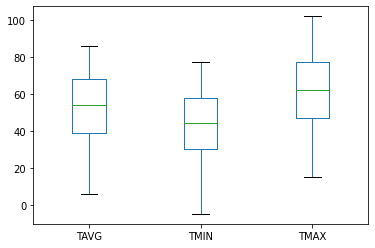

In [52]:
df2[['TAVG','TMIN','TMAX']].plot.box()

Convertendo para graus celsius a temperatura varia bastante de abaixo de 0 até 30+

(b) Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as<br>
medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a<br>
distribuição de dados?


<AxesSubplot:>

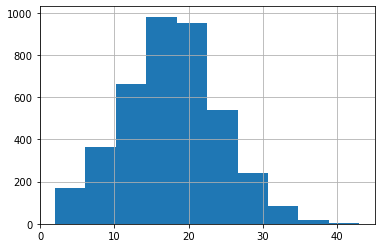

In [53]:
df2['TDIFF']=df2['TMAX']-df2['TMIN']
df2['TDIFF'].hist()

A maior diferença de tempetura é de aproximadamente 15 à aproximadamente 23

(c) Você agora preparará os DataFrames das abordagens de trânsito e de classificação do<br>
clima (o dessa sessão) para que estejam prontos para serem mesclados. No DataFrame<br>
sobre abordagens no trânsito, você transformará o índice stop_datetime para uma coluna (reset_index), pois o índice será <br>perdido durante a mesclagem. Com o DataFrame<br>
meteorológico, selecione as colunas DATE e rating e coloque em um novo dataframe;

In [54]:
df1=df1.reset_index()

In [55]:
df2['DATE']=pd.to_datetime(df2['DATE'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  4017 non-null   object        
 1   DATE     4017 non-null   datetime64[ns]
 2   TAVG     1217 non-null   float64       
 3   TMIN     4017 non-null   int64         
 4   TMAX     4017 non-null   int64         
 5   AWND     4017 non-null   float64       
 6   WSF2     4017 non-null   float64       
 7   WT01     1767 non-null   float64       
 8   WT02     221 non-null    float64       
 9   WT03     224 non-null    float64       
 10  WT04     117 non-null    float64       
 11  WT05     360 non-null    float64       
 12  WT06     25 non-null     float64       
 13  WT07     79 non-null     float64       
 14  WT08     404 non-null    float64       
 15  WT09     69 non-null     float64       
 16  WT10     2 non-null      float64       
 17  WT11     1 non-null      float64 

In [56]:
date=df2['DATE']

(d) Agora, mescle os dataframes gerados em um novo dataframe, unidos usando a coluna<br>
stop_date de do dataframe policial e a coluna DATE do novo dataframe gerado a partir<br>
dos dados meteorológicos. Assim que a mesclagem for concluída, defina stop_datetime<br>
novamente como o índice;

In [57]:
df3=df1.merge(df2, right_index=True, left_index=True, how='outer')

In [58]:
df3.set_index('index', inplace=True)

In [59]:
df3

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
index,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,2022-03-27 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
2005-01-23 23:15:00,2005-01-23,2022-03-27 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16.0
2005-02-17 04:15:00,2005-02-17,2022-03-27 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9.0
2005-02-20 17:15:00,2005-02-20,2022-03-27 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0
2005-02-24 01:20:00,2005-02-24,2022-03-27 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,2022-03-27 21:21:00,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 21:59:00,2015-12-31,2022-03-27 21:59:00,F,White,Speeding,Speeding,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 22:04:00,2015-12-31,2022-03-27 22:04:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(e) A partir desse novo dataframe criado, levante duas questões e as responda usando qualquer técnica que ache necessária.

A etnia do motorista influencia o comportamento da polícia durante uma parada no trânsito?

Compare as infracoes cometidas por cada etnia, para isso contrua uma distribuicao da variavel driver_race e mostre seu gráfico

In [60]:
df3['driver_race'].value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [61]:
a=df3['driver_race'].value_counts(normalize=True)*100
a

White       71.496256
Black       14.196404
Hispanic    11.240409
Asian        2.760701
Other        0.306231
Name: driver_race, dtype: float64

<AxesSubplot:ylabel='driver_race'>

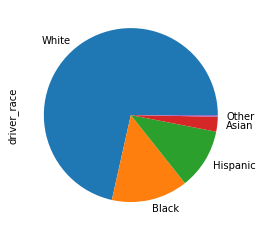

In [62]:
a.plot.pie(fig=(7,7))

Etnias espeficas sao mais revistadas que outras? Para isso compare os dados, mostre em um grafico e comente

In [63]:
brancos=df3.loc[df3['driver_race']=='White']
brancos=brancos['search_conducted']
brancos.value_counts(normalize=True)*100

False    97.03572
True      2.96428
Name: search_conducted, dtype: float64

In [64]:
negros=df3.loc[df3['driver_race']=='Black']
negros=negros['search_conducted']
negros.value_counts(normalize=True)*100

False    93.300773
True      6.699227
Name: search_conducted, dtype: float64

In [65]:
espanhol=df3.loc[df3['driver_race']=='Hispanic']
espanhol=espanhol['search_conducted']
espanhol.value_counts(normalize=True)*100

False    93.852164
True      6.147836
Name: search_conducted, dtype: float64

In [66]:
asiatico=df3.loc[df3['driver_race']=='Asian']
asiatico=asiatico['search_conducted']
asiatico.value_counts(normalize=True)*100

False    97.948933
True      2.051067
Name: search_conducted, dtype: float64

Motoristas negros e espanhois tem proporcionalmente o dobro de revistamentos feitos<br>
pela policia em relação a motoristas brancos e asiaticos.

<AxesSubplot:xlabel='driver_race'>

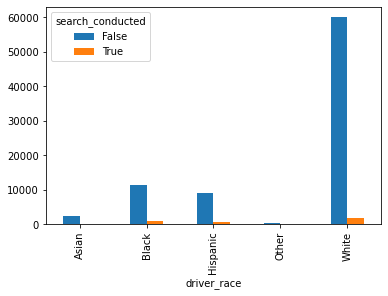

In [67]:
a=pd.crosstab(df1['driver_race'], df1['search_conducted'])
a.plot.bar()